<a href="https://colab.research.google.com/github/RafayAK/TensorFlow_FashionMNIST/blob/master/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

# Helper libs
import numpy as np
import matplotlib.pyplot as plt

print (tf.__version__)

1.12.0


In [2]:
# test if GPU in use
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
# check which GUP is in use
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7430078825967818138, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12672737323321664305
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7759971780282170651
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11281553818
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4503741309066659478
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [4]:
# using Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print("train data shape: " + str(train_images.shape))
print("train labels shape: " + str(train_labels.shape))

print("test data shape: " +  str(test_images.shape))
print("test labels shape: " + str(test_labels.shape))

train data shape: (60000, 28, 28)
train labels shape: (60000,)
test data shape: (10000, 28, 28)
test labels shape: (10000,)


In [6]:
print(train_images[0,:,:].shape) #each image is 28x28 numpy array with values from 0 to 255

(28, 28)


In [7]:
print(train_labels[0]) # each label is a values from 0-9

9


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [10]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

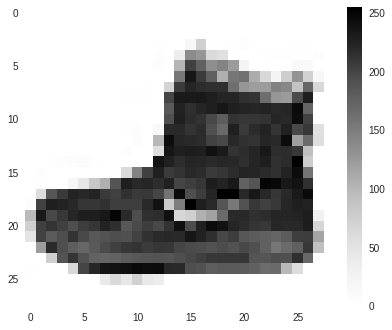

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [0]:
# scale the values 

train_images = train_images / 255.0
test_images = test_images / 255.0

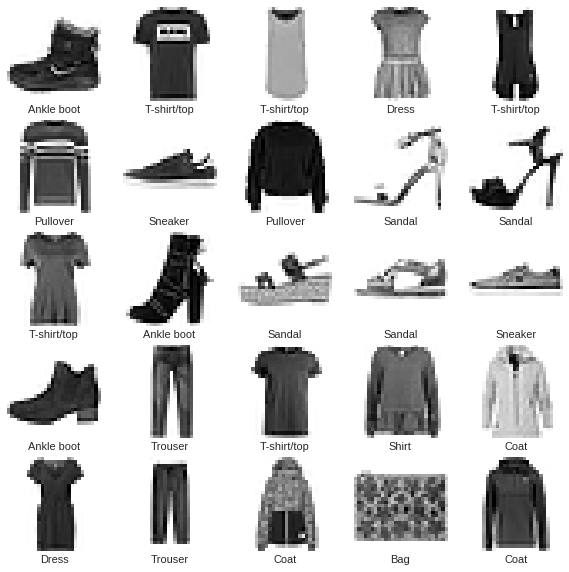

In [13]:
# display the first 25 images from training set with class names below
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [0]:
# set up layers

#set seed value
np.random.seed(1)

model_relu = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # Convete 28x28 inputs to a 28*28 =784 vector 
    keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer=tf.glorot_normal_initializer(seed=1)), # liner + relu activarion layer 128 neuron output
    keras.layers.Dense(10, activation=tf.nn.softmax, kernel_initializer=tf.glorot_normal_initializer(seed=1)) # softmax layer 10 outputs
])


In [0]:
# compile model 
 model_relu.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [101]:
# trian model
history_relu = model_relu.fit(train_images, train_labels, epochs=80)

Epoch 1/80
60000/60000 [==============================] - 7s 111us/step - loss: 0.5048 - acc: 0.8240
Epoch 2/80
60000/60000 [==============================] - 6s 104us/step - loss: 0.3788 - acc: 0.8641
Epoch 3/80
60000/60000 [==============================] - 6s 105us/step - loss: 0.3382 - acc: 0.8772
Epoch 4/80
60000/60000 [==============================] - 6s 107us/step - loss: 0.3142 - acc: 0.8842
Epoch 5/80
60000/60000 [==============================] - 6s 108us/step - loss: 0.2973 - acc: 0.8895
Epoch 6/80
60000/60000 [==============================] - 6s 107us/step - loss: 0.2802 - acc: 0.8969
Epoch 7/80
60000/60000 [==============================] - 6s 106us/step - loss: 0.2717 - acc: 0.8987
Epoch 8/80
60000/60000 [==============================] - 6s 106us/step - loss: 0.2579 - acc: 0.9046
Epoch 9/80
60000/60000 [==============================] - 6s 104us/step - loss: 0.2479 - acc: 0.9077
Epoch 10/80
60000/60000 [==============================] - 6s 105us/step - loss: 0.2394 - a

In [102]:
test_loss, test_acc = model_relu.evaluate(test_images, test_labels)
print("Test accuracy: ", str(test_acc))

10000/10000 [==============================] - 1s 93us/step
Test accuracy:  0.8854


In [0]:
# make predictions

predictions = model_relu.predict(test_images)

In [19]:
predictions[0]

array([1.0010714e-04, 1.5585442e-06, 4.3779230e-05, 1.9711364e-05,
       8.4652573e-05, 2.4699578e-03, 8.2292194e-05, 1.4800994e-01,
       1.4623899e-03, 8.4772563e-01], dtype=float32)

In [20]:
np.argmax(predictions[0]) # return the index with the highest probability

9

In [21]:
test_labels[0]

9

In [22]:
test_images[0].shape

(28, 28)

In [0]:
# graph predictions per example
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
    
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label],
                                       color=color)
                              
            )

  
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  
  plt.xticks([])
  plt.yticks([])
  
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
    
    
  

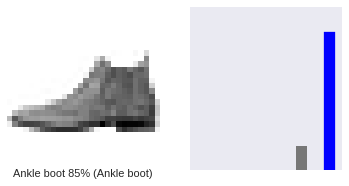

In [24]:
i = 0 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

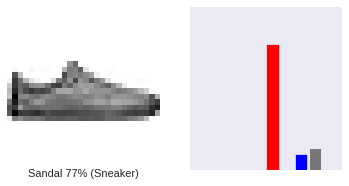

In [25]:
i = 12 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

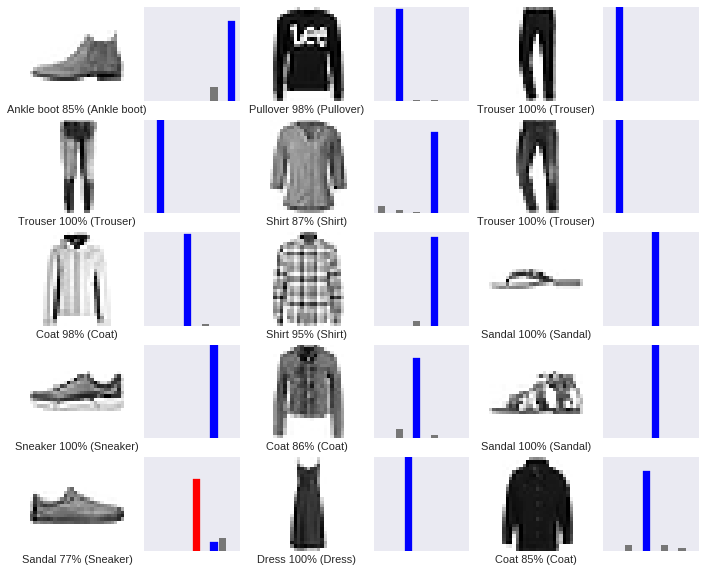

In [26]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [27]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [28]:
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. 
# So even though we're using a single image, we need to add it to a list

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [32]:
# Now we can predict this image

predictions_single = model_relu.predict(img)

print(predictions_single)

[[1.0010734e-04 1.5585484e-06 4.3779306e-05 1.9711399e-05 8.4652813e-05
  2.4699620e-03 8.2292347e-05 1.4801000e-01 1.4623913e-03 8.4772557e-01]]


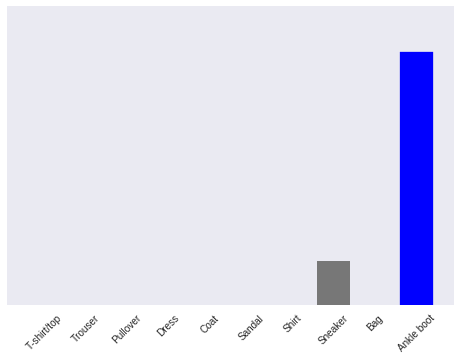

In [33]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [34]:
np.argmax(predictions_single[0])

9

# Second model using the Softpuls activation instead of ReLU


In [0]:
# set up layers

#set seed value
np.random.seed(1)

model_softplus = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # Convete 28x28 inputs to a 28*28 =784 vector 
    keras.layers.Dense(128, activation=tf.keras.activations.softplus, kernel_initializer=tf.glorot_normal_initializer(seed=1)), # liner + softplus activarion layer 128 neuron output
    keras.layers.Dense(10, activation=tf.nn.softmax, kernel_initializer=tf.glorot_normal_initializer(seed=1)) # softmax layer 10 outputs
])


In [0]:
# compile mode
model_softplus.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [105]:
history_softplus = model_softplus.fit(train_images, train_labels, epochs=80)

Epoch 1/80
60000/60000 [==============================] - 7s 123us/step - loss: 0.5113 - acc: 0.8212
Epoch 2/80
60000/60000 [==============================] - 7s 117us/step - loss: 0.3829 - acc: 0.8609
Epoch 3/80
60000/60000 [==============================] - 7s 117us/step - loss: 0.3430 - acc: 0.8758
Epoch 4/80
60000/60000 [==============================] - 8s 125us/step - loss: 0.3164 - acc: 0.8832
Epoch 5/80
60000/60000 [==============================] - 7s 123us/step - loss: 0.2968 - acc: 0.8899
Epoch 6/80
60000/60000 [==============================] - 8s 130us/step - loss: 0.2780 - acc: 0.8970
Epoch 7/80
60000/60000 [==============================] - 7s 118us/step - loss: 0.2655 - acc: 0.9008
Epoch 8/80
60000/60000 [==============================] - 7s 118us/step - loss: 0.2511 - acc: 0.9060
Epoch 9/80
60000/60000 [==============================] - 7s 122us/step - loss: 0.2404 - acc: 0.9098
Epoch 10/80
60000/60000 [==============================] - 7s 120us/step - loss: 0.2280 - a

In [106]:
test_loss_softplus, test_acc_softplus = model_softplus.evaluate(test_images, test_labels)
print("Test accuracy: ", str(test_acc_softplus))

10000/10000 [==============================] - 1s 108us/step
Test accuracy:  0.892


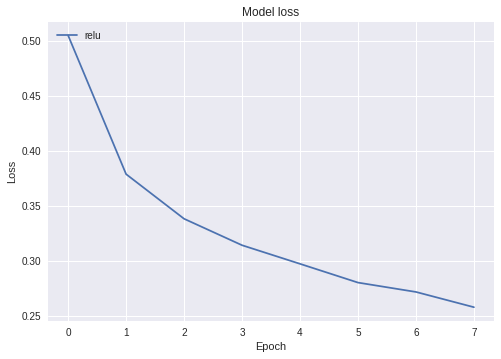

In [79]:
# Plot training & validation loss values
plt.plot(history_relu.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['relu'], loc='upper left')
plt.show()

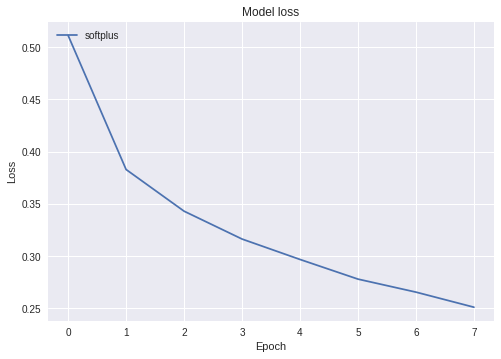

In [78]:
# Plot training & validation loss values
plt.plot(history_softplus.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['softplus'], loc='upper left')
plt.show()

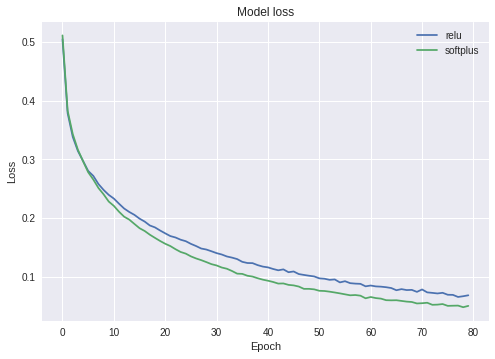

In [107]:
# Plot training & validation loss values
plt.plot(history_relu.history['loss'])
plt.plot(history_softplus.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['relu', 'softplus'], loc='upper right')
plt.show()

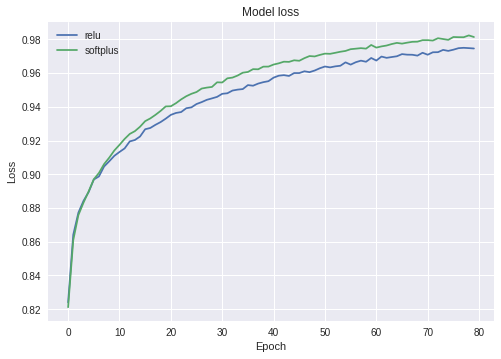

In [111]:
# Plot training accuracy values
plt.plot(history_relu.history['acc'])
plt.plot(history_softplus.history['acc'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['relu', 'softplus'], loc='upper left')
plt.show()